# Problem Statement:

## Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.

### Do ETL: Extract-Transform-Load some Amazon dataset and find for me
### Sales-trend -> month-wise, year-wise, yearly_month-wise
### Find key metrics and factors and show the meaningful relationships between attributes. Do your own research and come up with your findings.

# Importing the required Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

## Importing the Dataset

In [2]:
df = pd.read_csv('Amazon Sales data.csv')
df1 = df.copy()
df1.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
df1 = df1[["Order ID","Order Date","Order Priority",
                         "Ship Date","Item Type","Region","Country","Sales Channel","Units Sold","Unit Price",
                         "Unit Cost","Total Revenue","Total Cost","Total Profit"]]
df1.head()

,Order ID,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,669165933,5/28/2010,H,6/27/2010,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,963881480,8/22/2012,C,9/15/2012,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,576782.80,328376.44,248406.36
2,341417157,5/2/2014,L,5/8/2014,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,514321792,6/20/2014,C,7/5/2014,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82
4,115456712,2/1/2013,L,2/6/2013,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,3296425.02,2657347.52,639077.50


#### Getting the Column names from the dataset

In [4]:
df1.columns

Index(['Order ID', 'Order Date', 'Order Priority', 'Ship Date', 'Item Type',
       'Region', 'Country', 'Sales Channel', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [5]:
df1.dtypes

Order ID            int64
Order Date         object
Order Priority     object
Ship Date          object
Item Type          object
Region             object
Country            object
Sales Channel      object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [6]:
df1.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [7]:
df1.loc[:,["Total Revenue","Total Profit"]].iloc[:]

,Total Revenue,Total Profit
0,2533654.00,951410.50
1,576782.80,248406.36
2,1158502.59,224598.75
3,75591.66,19525.82
4,3296425.02,639077.50
...,...,...
95,97040.64,65214.72
96,58471.11,15103.47
97,228779.10,93748.05
98,471336.91,144521.02


In [8]:
df1.shape

(100, 14)

In [9]:
np.corrcoef(df1.loc[:,'Total Revenue'].iloc[:],df1.loc[:,'Total Profit'].iloc[:])

array([[1.        , 0.89732687],
       [0.89732687, 1.        ]])

### Observation 1: Very strong Positive Correlation between Total Revenue and Total Profit

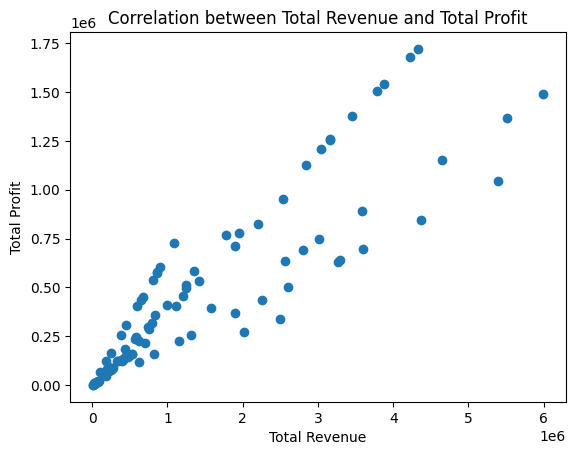

In [10]:
plt.scatter(df1['Total Revenue'], df1['Total Profit'])
plt.xlabel('Total Revenue')
plt.ylabel('Total Profit')
plt.title('Correlation between Total Revenue and Total Profit')
plt.show()

In [11]:
df1.set_index('Order ID',inplace=True)
df1.head()

,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,,,,,,,,
669165933,5/28/2010,H,6/27/2010,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,2533654.00,1582243.50,951410.50
963881480,8/22/2012,C,9/15/2012,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,576782.80,328376.44,248406.36
341417157,5/2/2014,L,5/8/2014,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,1158502.59,933903.84,224598.75
514321792,6/20/2014,C,7/5/2014,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82
115456712,2/1/2013,L,2/6/2013,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [12]:
df2=df1.loc[:,["Units Sold","Unit Price","Unit Cost","Total Revenue","Total Cost","Total Profit"]].iloc[:]

In [13]:
df2.cov()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,7.809144e+06,-4.640481e+04,-4.850918e+04,1.826973e+09,1.135124e+09,6.918495e+08
Unit Price,-4.640481e+04,5.550370e+04,4.377593e+04,2.587902e+08,2.012054e+08,5.758482e+07
Unit Cost,-4.850918e+04,4.377593e+04,3.542232e+04,1.966455e+08,1.580833e+08,3.856216e+07
Total Revenue,1.826973e+09,2.587902e+08,1.966455e+08,2.131684e+12,1.557145e+12,5.745386e+11
Total Cost,1.135124e+09,2.012054e+08,1.580833e+08,1.557145e+12,1.174922e+12,3.822231e+11
Total Profit,6.918495e+08,5.758482e+07,3.856216e+07,5.745386e+11,3.822231e+11,1.923155e+11


In [14]:
df2.corr(method='pearson')

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550
Unit Price,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365
Unit Cost,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214
Total Revenue,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327
Total Cost,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091
Total Profit,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000


### Observation 2: The negative value of correlation coefficient among Units Sold and Unit Cost implies that quantity of products is inversely proportional to their cost. Same is the scenario with Units Sold and Units Price. Lesser the number of units of a product available, more will be it's price.

In [15]:
np.average(df1['Total Profit'])

441681.98399999994

In [16]:
### At an average, the profit generated for a product is ₹441681.98.

In [17]:
np.max(df1['Total Profit'])

1719922.04

In [18]:
np.min(df1['Total Profit'])

1258.02

In [19]:
### Maximum and minimum profit generated are ₹ 1719922.04 and ₹ 1258.09 respectively.

In [20]:
np.max(df1['Total Revenue'])

5997054.98

In [21]:
np.min(df1['Total Revenue'])

4870.26

### Observation 3: Maximum and minimum revenue generated by the product are ₹ 5997054.98 and ₹ 4870.26.

(array([44., 18.,  8.,  6.,  6.,  9.,  2.,  4.,  1.,  2.]),
 array([4.87026000e+03, 6.04088732e+05, 1.20330720e+06, 1.80252568e+06,
        2.40174415e+06, 3.00096262e+06, 3.60018109e+06, 4.19939956e+06,
        4.79861804e+06, 5.39783651e+06, 5.99705498e+06]),
 <BarContainer object of 10 artists>)

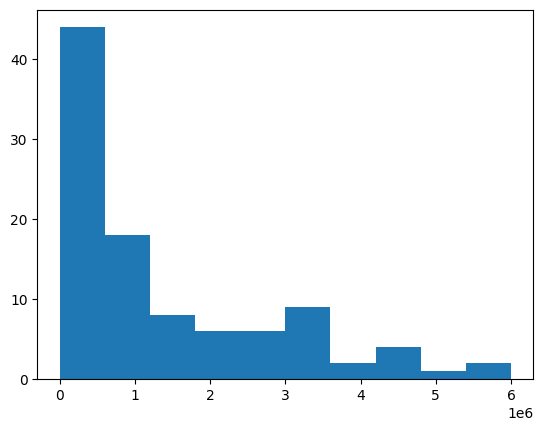

In [22]:
plt.hist(df1['Total Revenue'])

In [23]:
df1.head()

,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,,,,,,,,
669165933,5/28/2010,H,6/27/2010,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,2533654.00,1582243.50,951410.50
963881480,8/22/2012,C,9/15/2012,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,576782.80,328376.44,248406.36
341417157,5/2/2014,L,5/8/2014,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,1158502.59,933903.84,224598.75
514321792,6/20/2014,C,7/5/2014,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82
115456712,2/1/2013,L,2/6/2013,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [24]:
df2

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,
669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50
963881480,2804,205.70,117.11,576782.80,328376.44,248406.36
341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75
514321792,8102,9.33,6.92,75591.66,56065.84,19525.82
115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...
512878119,888,109.28,35.84,97040.64,31825.92,65214.72
810711038,6267,9.33,6.92,58471.11,43367.64,15103.47
728815257,1485,154.06,90.93,228779.10,135031.05,93748.05


In [25]:
df2.corr(method='pearson')

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550
Unit Price,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365
Unit Cost,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214
Total Revenue,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327
Total Cost,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091
Total Profit,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000


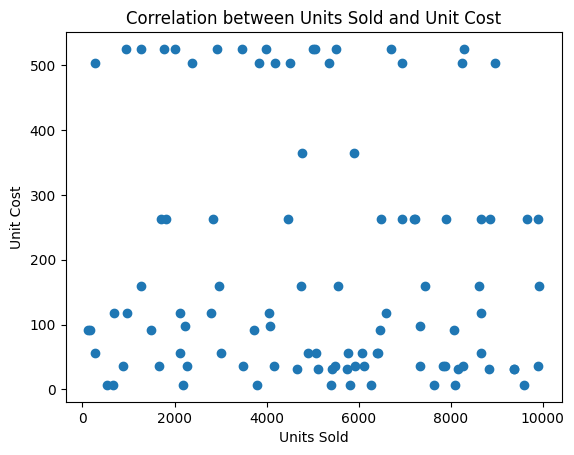

In [26]:
plt.scatter(df1['Units Sold'],df1['Unit Cost'])
plt.xlabel('Units Sold')
plt.ylabel('Unit Cost')
plt.title('Correlation between Units Sold and Unit Cost')
plt.show()

### Observation 5: The above Scatter Graph depicts that the Unit Cost and Units Sold are *Inversely Proportional* to each other

In [27]:
np.min(df1['Unit Cost'])

6.92

In [28]:
np.max(df1['Unit Cost'])

524.96

In [29]:
np.mean(df1['Unit Cost'])

191.048

In [30]:
np.median(df1['Unit Cost'])

107.275

### Observation 6: Maximum and minimum unit costs are ₹ 6.92 and ₹ 524.96 respectively. Average unit cost of a product is ₹ 191.05. The Unit Cost variable varies considerably throughout it's distribution. The median cost of a unit stands at ₹ 107.275

Text(0, 0.5, 'Total Profit')

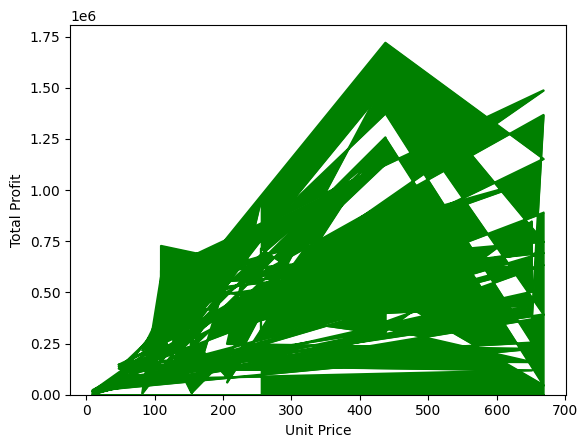

In [31]:
df1.plot.area(x='Unit Price',y='Total Profit',color='green',stacked=True, legend=None)
plt.ylabel('Total Profit')

### Obersvation 7: Maximum profit has been generated in the unit price range of ₹400-₹500.

Text(0, 0.5, 'Total Revenue')

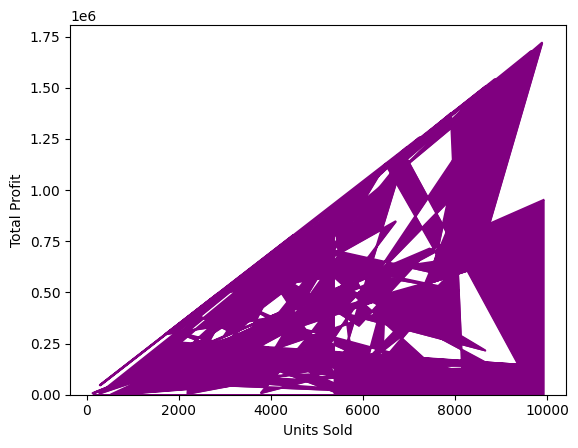

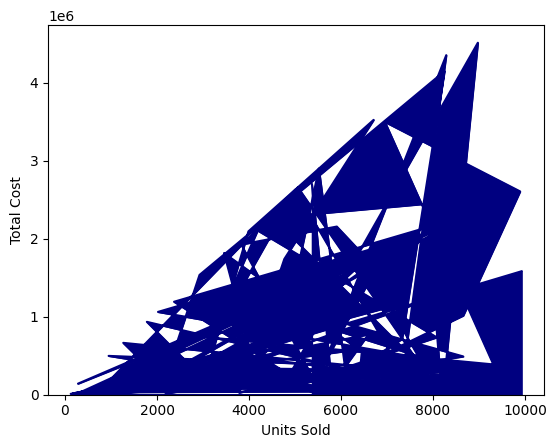

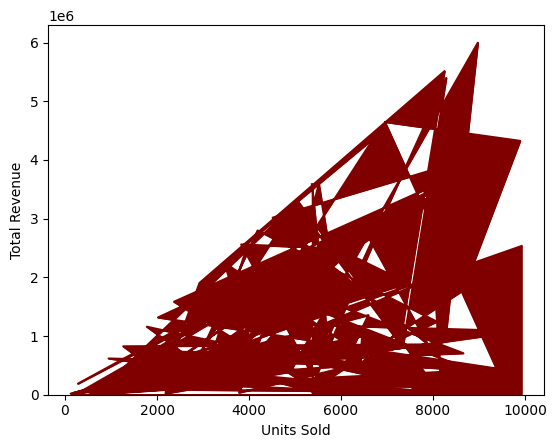

In [32]:
df1.plot.area(x='Units Sold',y='Total Profit',color='purple',legend=None)
plt.ylabel('Total Profit')
df1.plot.area(x='Units Sold',y='Total Cost',color='navy',legend=None)
plt.ylabel('Total Cost')
df1.plot.area(x='Units Sold',y='Total Revenue',color='maroon',legend=None)
plt.ylabel('Total Revenue')

### Observation 8: Maximum Profit, Cost and Revenue is generated when 8000 to 10000 units of a product were sold.

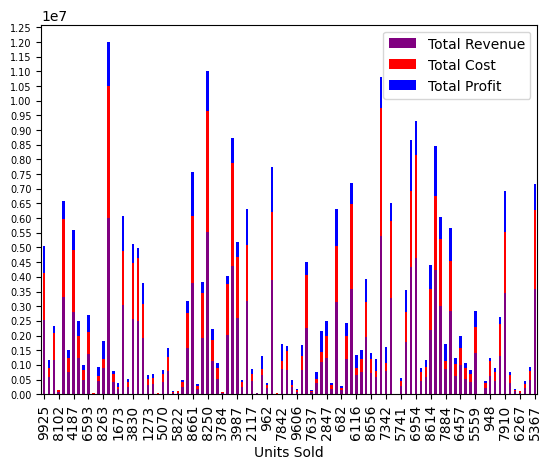

In [33]:
df1.plot.bar(x='Units Sold',y=['Total Revenue','Total Cost','Total Profit'],color=['purple','red','blue'],stacked=True,rot=True)
plt.xticks(rotation=90)
plt.locator_params(nbins=38)
plt.tick_params(axis='y', which='major', labelsize=7)

Text(0.5, 0, 'Total Revenue')

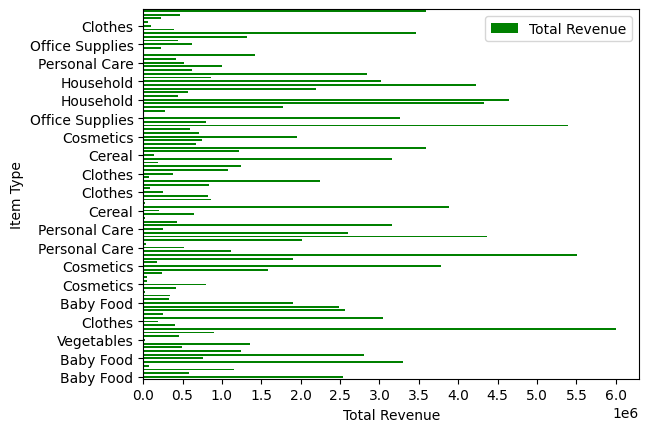

In [34]:
df1.plot.barh(x='Item Type',y='Total Revenue',color='green')
plt.locator_params(nbins=20)
plt.xlabel('Total Revenue')

In [35]:
df1['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [36]:
items = ['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks']
df1['Item Type'] = pd.Categorical(df1['Item Type'],categories=items,ordered=True)

<Axes: xlabel='Item Type'>

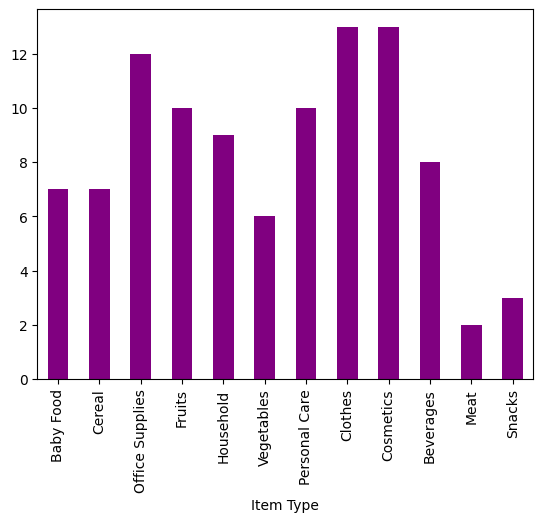

In [37]:
df1.groupby('Item Type', observed=False)['Total Revenue'].count().plot(kind='bar', color='purple')

### Observation 9: Maximum revenue has been generated from the items 'Clothes' and 'Cosmetics' closely followed by 'Office Supplies'.

<Axes: >

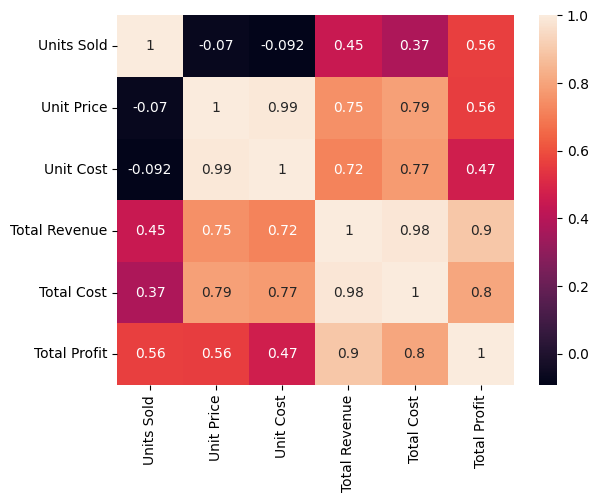

In [38]:
sn.heatmap(df2.corr(),annot=True)

### Observation 10: From the above heatmap, we can infer that
### (a) Total Cost is strongly related to Unit Price, Unit Cost, Total Revenue and Total Profit. 
### (b) Units Sold and {Unit Price and Unit Cost} are completely independent. Number of units sold are independent of price charged per unit of a product and same with cost of a unit which is independent of units sold.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Australia and Oceania'),
  Text(1, 0, 'Central America and the Caribbean'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Sub-Saharan Africa'),
  Text(4, 0, 'Asia'),
  Text(5, 0, 'Middle East and North Africa'),
  Text(6, 0, 'North America')])

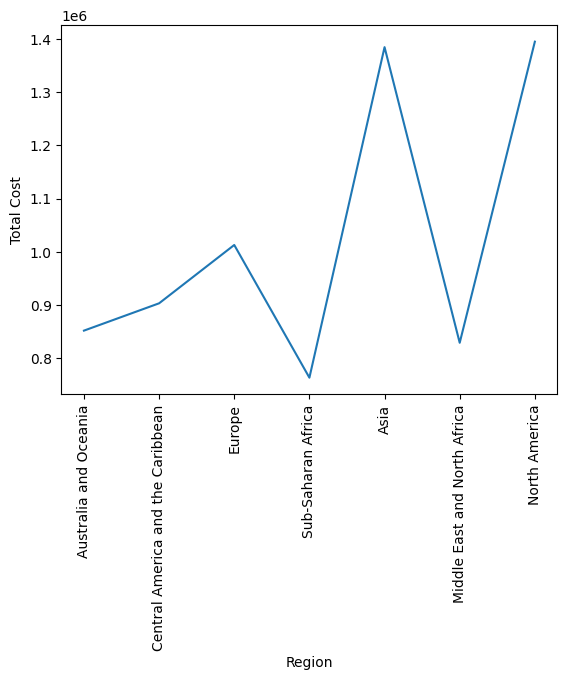

In [39]:
sn.lineplot(x='Region',y='Total Cost',data=df1, errorbar=None)
plt.xticks(rotation=90)

### Observation 11: Products have been much more expensive in Asia and North America in comparison to other continents.

Text(0, 0.5, 'Total Profit')

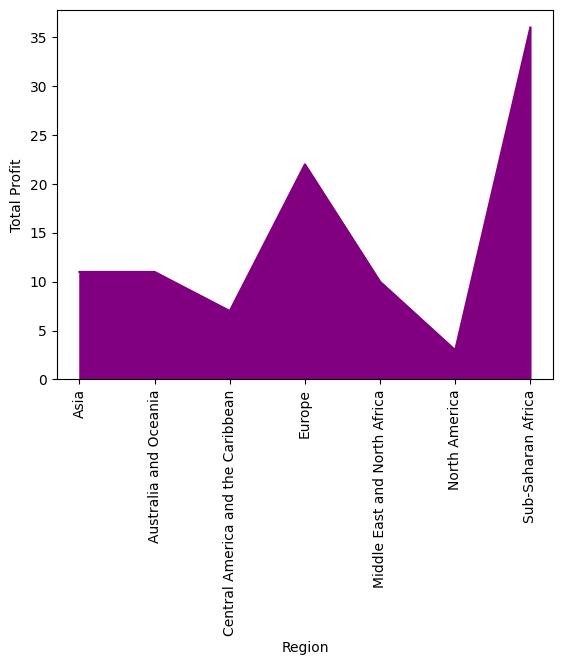

In [40]:
df1.groupby('Region')['Total Profit'].count().plot(kind='area', color='purple')
plt.xticks(rotation=90)
plt.ylabel('Total Profit')

### Observation 12: Maximum profit has been generated in the Sub-Saharan African region while minimum profit has been generated in the North American region.

In [41]:
df1['Country'].unique()

array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

In [42]:
countries= df['Country'].unique()

In [43]:
countries

array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

In [44]:
df1['Country'] = pd.Categorical(df1['Country'],categories=countries,ordered=True)

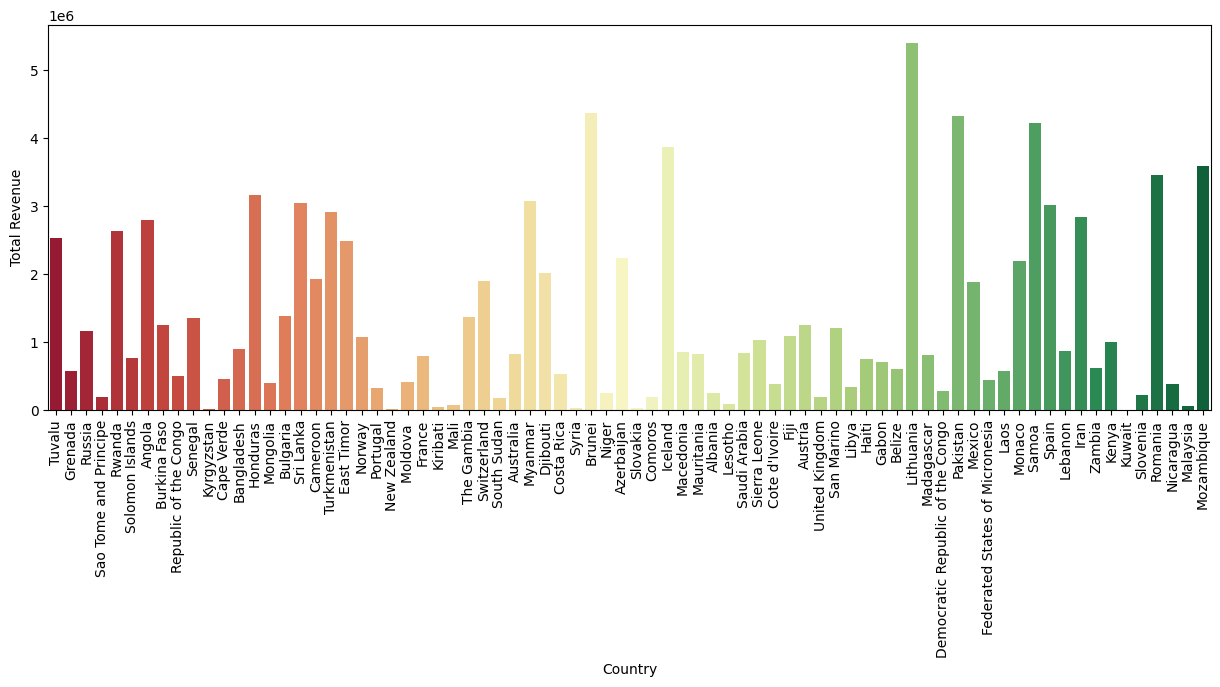

In [45]:
plt.figure(figsize=(15,5))
sn.barplot(x='Country', y='Total Revenue', data=df1, errorbar=None, palette='RdYlGn', hue='Country', legend=False)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

### Observation 13: Lithuania is the country where maximum revenue has been generated followed by Brunei and Pakistan.

Text(0, 0.5, 'Total Revenue')

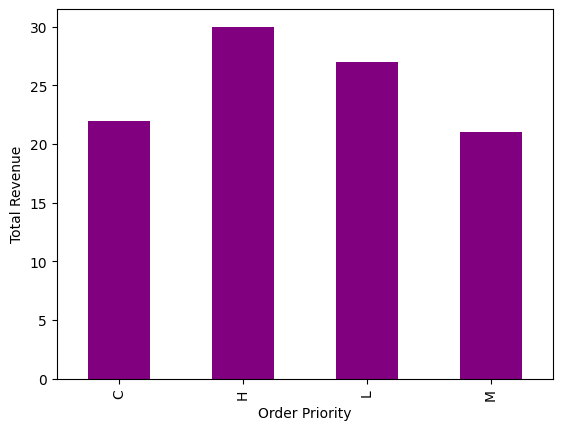

In [46]:
df1.groupby('Order Priority')['Total Revenue'].count().plot(kind='bar',color='purple')
plt.ylabel('Total Revenue')

### Observation 14: Maximum number of revenues has been generated by the products having order priority 'H' while minimum revenues has been generated by 'M' priority products.

In [47]:
df1.head()

,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,,,,,,,,
669165933,5/28/2010,H,6/27/2010,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,2533654.00,1582243.50,951410.50
963881480,8/22/2012,C,9/15/2012,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,576782.80,328376.44,248406.36
341417157,5/2/2014,L,5/8/2014,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,1158502.59,933903.84,224598.75
514321792,6/20/2014,C,7/5/2014,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82
115456712,2/1/2013,L,2/6/2013,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 669165933 to 665095412
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Order Date      100 non-null    object  
 1   Order Priority  100 non-null    object  
 2   Ship Date       100 non-null    object  
 3   Item Type       100 non-null    category
 4   Region          100 non-null    object  
 5   Country         100 non-null    category
 6   Sales Channel   100 non-null    object  
 7   Units Sold      100 non-null    int64   
 8   Unit Price      100 non-null    float64 
 9   Unit Cost       100 non-null    float64 
 10  Total Revenue   100 non-null    float64 
 11  Total Cost      100 non-null    float64 
 12  Total Profit    100 non-null    float64 
dtypes: category(2), float64(5), int64(1), object(5)
memory usage: 12.6+ KB


Text(0.5, 1.0, 'Distribution of profit on the basis of order priority')

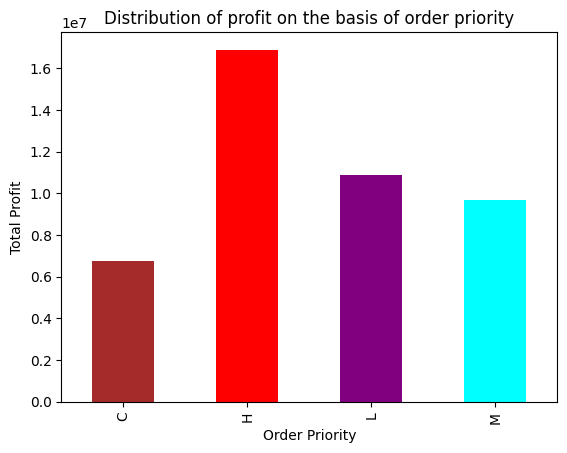

In [49]:
df1.groupby('Order Priority')['Total Profit'].sum().plot(kind='bar',color=['brown','red','purple','aqua'])
plt.ylabel('Total Profit')
plt.title('Distribution of profit on the basis of order priority')

### Observation 15: Maximum profit has been generated by products having order priority 'H' while minimum profit has been obtained in case of 'C' priority product orders.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Baby Food'),
  Text(1, 0, 'Cereal'),
  Text(2, 0, 'Office Supplies'),
  Text(3, 0, 'Fruits'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Vegetables'),
  Text(6, 0, 'Personal Care'),
  Text(7, 0, 'Clothes'),
  Text(8, 0, 'Cosmetics'),
  Text(9, 0, 'Beverages'),
  Text(10, 0, 'Meat'),
  Text(11, 0, 'Snacks')])

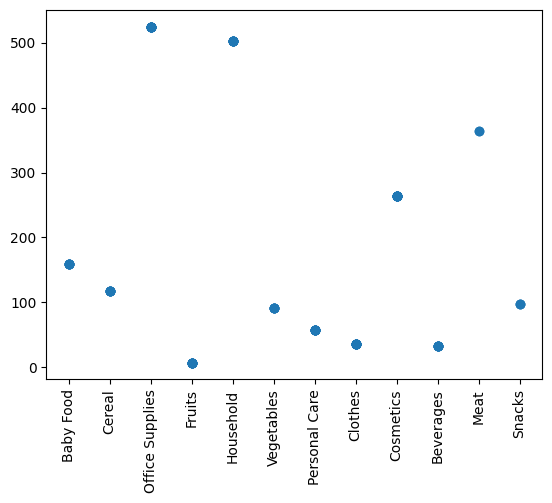

In [50]:
plt.scatter(df1['Item Type'],df1['Unit Cost'])
plt.xticks(rotation=90)

### Observation 16: Office Supplies have the maximum unit cost while Fruits have minimum unit cost.

In [51]:
df1['Item Type'].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

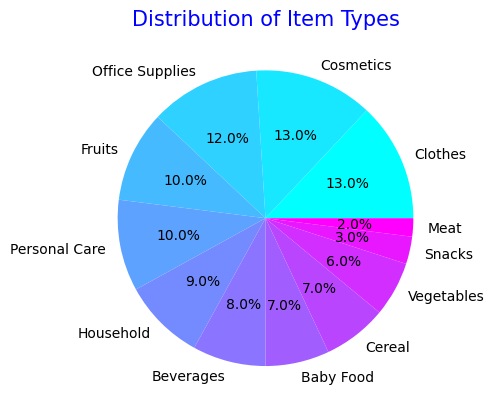

In [52]:
import matplotlib.cm as cm
# Define the data and labels
sizes = df1['Item Type'].value_counts().values
labels = df1['Item Type'].value_counts().index
# Create a list of colors from the cool colormap
colors = cm.cool(np.linspace(0, 1, len(sizes)))
# Create the pie plot with the colors
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Item Types', fontsize=15, color='blue')
plt.show()

### Observation 17: Clothes and cosmetics are the most purchased items while meat and snacks are the least purchased ones.

In [53]:
df3=df1.loc[:,["Ship Date","Total Profit"]].iloc[:]

In [54]:
df3

,Ship Date,Total Profit
Order ID,,
669165933,6/27/2010,951410.50
963881480,9/15/2012,248406.36
341417157,5/8/2014,224598.75
514321792,7/5/2014,19525.82
115456712,2/6/2013,639077.50
...,...,...
512878119,9/3/2011,65214.72
810711038,12/28/2011,15103.47
728815257,6/29/2016,93748.05


In [55]:
df3['Ship Date']=pd.to_datetime(df3['Ship Date'],format='mixed')

In [56]:
df3

,Ship Date,Total Profit
Order ID,,
669165933,2010-06-27,951410.50
963881480,2012-09-15,248406.36
341417157,2014-05-08,224598.75
514321792,2014-07-05,19525.82
115456712,2013-02-06,639077.50
...,...,...
512878119,2011-09-03,65214.72
810711038,2011-12-28,15103.47
728815257,2016-06-29,93748.05


Text(0, 0.5, 'Total Profit')

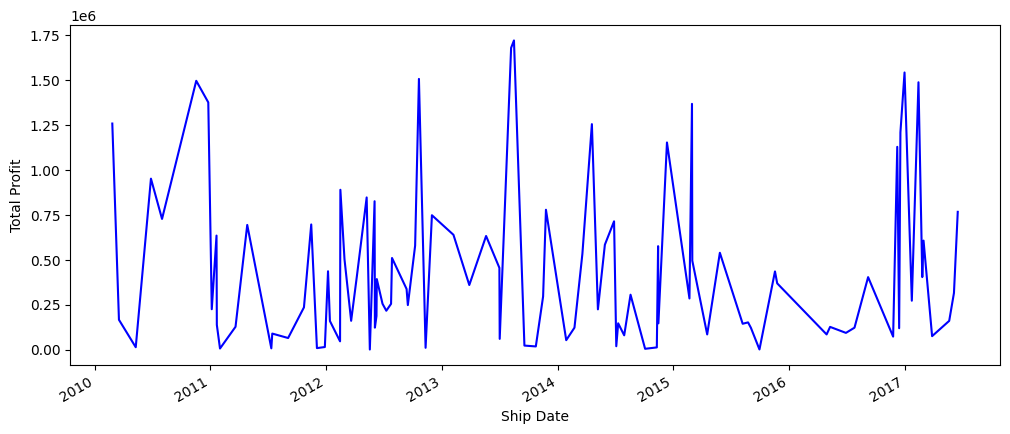

In [57]:
plt.figure(figsize=(12,5))
df3.groupby('Ship Date')['Total Profit'].sum().plot(kind='line',color='blue')
plt.ylabel('Total Profit')

### Observation 18: 

### Filtering the dates, yearwise

In [58]:
#mask=(df1['date'] >= '2011-01-01') & (df['date'] <= '2011-12-31')

In [59]:
df1['Ship Date']=pd.to_datetime(df1['Ship Date'],format='mixed')

In [60]:
df1.head(10)

,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,,,,,,,,
669165933,5/28/2010,H,2010-06-27,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,2533654.00,1582243.50,951410.50
963881480,8/22/2012,C,2012-09-15,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,576782.80,328376.44,248406.36
341417157,5/2/2014,L,2014-05-08,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,1158502.59,933903.84,224598.75
514321792,6/20/2014,C,2014-07-05,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82
115456712,2/1/2013,L,2013-02-06,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,3296425.02,2657347.52,639077.50
547995746,2/4/2015,C,2015-02-21,Baby Food,Australia and Oceania,Solomon Islands,Online,2974,255.28,159.42,759202.72,474115.08,285087.64
135425221,4/23/2011,M,2011-04-27,Household,Sub-Saharan Africa,Angola,Offline,4187,668.27,502.54,2798046.49,2104134.98,693911.51
871543967,7/17/2012,H,2012-07-27,Vegetables,Sub-Saharan Africa,Burkina Faso,Online,8082,154.06,90.93,1245112.92,734896.26,510216.66
770463311,7/14/2015,M,2015-08-25,Personal Care,Sub-Saharan Africa,Republic of the Congo,Offline,6070,81.73,56.67,496101.10,343986.90,152114.20


## Year-Wise or Date Wise Total Revenue can be derived here along with Units Sold in that particular Time Period

In [61]:
mask=(df1['Ship Date'] >= '2012-01-01') & (df1['Ship Date'] <= '2012-12-31')

Text(0, 0.5, 'Total Revenue')

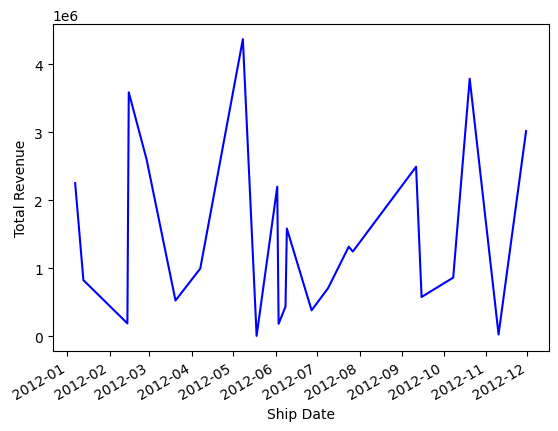

In [62]:
df_f=df1[mask]
df_f.groupby('Ship Date')['Total Revenue'].sum().plot(kind='line',color='blue')
plt.ylabel('Total Revenue')


Text(0, 0.5, 'Total Profit')

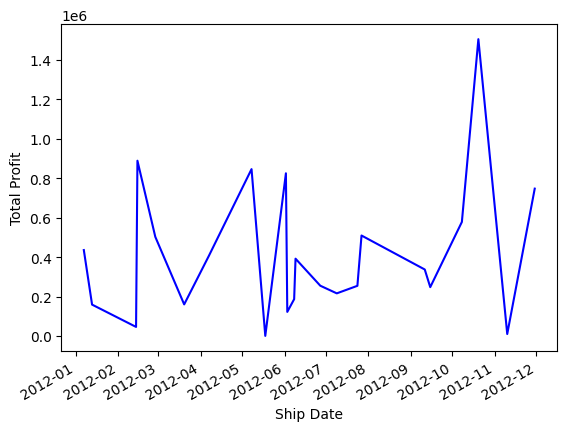

In [63]:
df_f.groupby('Ship Date')['Total Profit'].sum().plot(kind='line',color='blue')
plt.ylabel('Total Profit')

Text(0, 0.5, 'Units Sold')

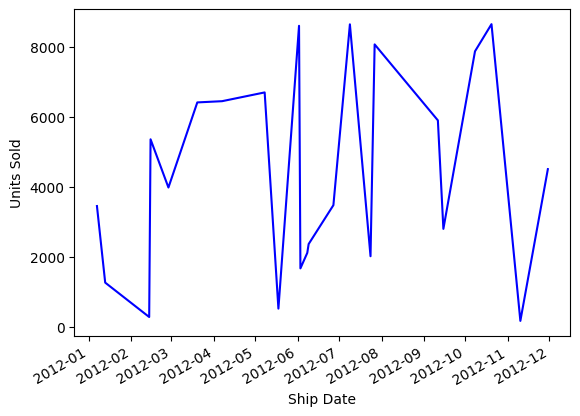

In [64]:
df_f.groupby('Ship Date')['Units Sold'].sum().plot(kind='line',color='blue')
plt.ylabel('Units Sold')

### Observation 19: October to November Period of 2012 had highest profit with  maximum products sold, while the revenue was highest in May 2012.